In [18]:
# For Data Loading And Manipulation
import pandas as pd
# For Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
# For Converting Object To Numerical Data Type
from sklearn.preprocessing import LabelEncoder
# To Scale The Data So That It was Not Dominated By a Particular Feature Of Data
from sklearn.preprocessing import StandardScaler
# To Divide The Data Into Two Parts Training and Testing
from sklearn.model_selection import train_test_split
# Different Algorithms for Prediction
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
#Loading the data set
mydata=pd.read_csv('cardekho_data.csv')

In [20]:
#Showing the data set
mydata.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [21]:
#Checking the type of data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
#Checking the data if there is any missing values
mydata.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

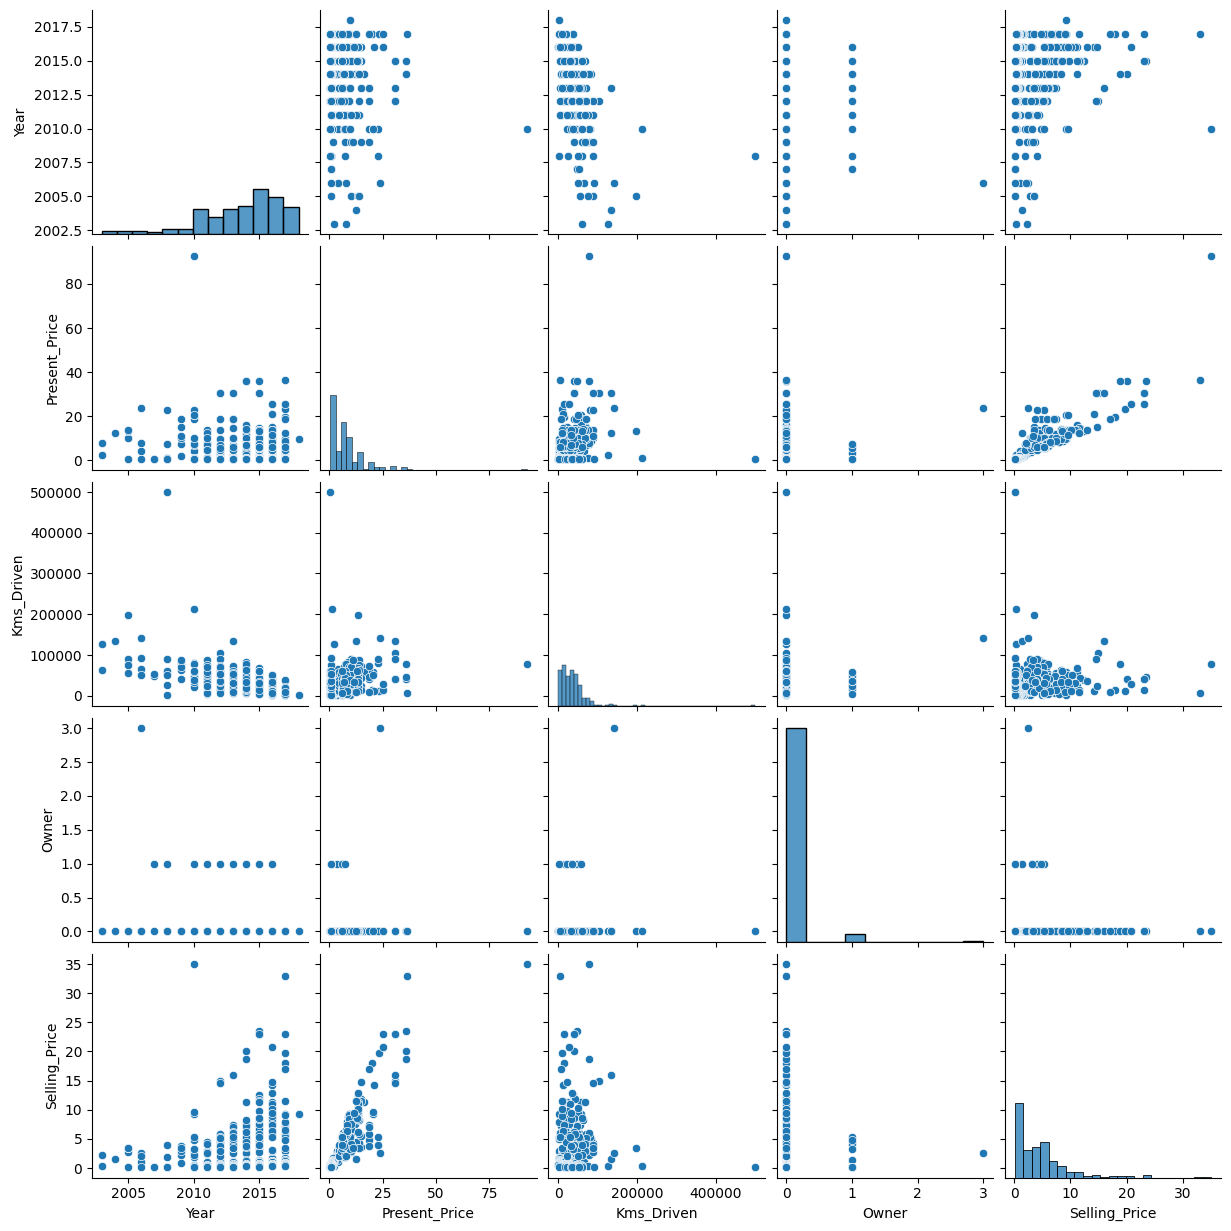

In [23]:
#Graphical analysis
sns.pairplot(mydata)
plt.show()

In [141]:
#Converting the object data into numerical data
Car_Name_le=LabelEncoder()
mydata['Car_Name']=Car_Name_le.fit_transform(mydata["Car_Name"])

In [142]:
#Converting the object data into numerical data
Fuel_Type_le=LabelEncoder()
mydata['Fuel_Type']=Fuel_Type_le.fit_transform(mydata["Fuel_Type"])

In [143]:
#Converting the object data into numerical data
Seller_Type_le=LabelEncoder()
mydata['Seller_Type']=Seller_Type_le.fit_transform(mydata["Seller_Type"])

In [144]:
#Converting the object data into numerical data
Transmission_le=LabelEncoder()
mydata['Transmission']=Transmission_le.fit_transform(mydata["Transmission"])

In [145]:
#Checking the update
mydata.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


In [146]:
#Separating input data
input_data=mydata.iloc[:,:-1]

In [147]:
#Separating output data
output_data=mydata["Selling_Price"]

In [148]:
#Scaling the data so the model is not dominated by a particular feature data
ss=StandardScaler()

In [149]:
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [150]:
#Spliting the data into training and testing data set
x_train , x_test , y_train , y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [151]:
#Applying Linear regression 
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

84.65539666857805

In [152]:
#Applying Lasso regression 
lr2=Lasso(alpha=.1)
lr2.fit(x_train,y_train)
lr2.score(x_test,y_test)*100

84.07873180959541

In [153]:
#Applying Ridge regression 
lr3=Ridge(alpha=.1)
lr3.fit(x_train,y_train)
lr3.score(x_test,y_test)*100

84.65106312339066

In [154]:
#Applying ElasticNet regression 
lr4=ElasticNet(alpha=.1)
lr4.fit(x_train,y_train)
lr4.score(x_test,y_test)*100

83.75582135434175

In [155]:
#Applying DecisionTreeRegressor regression 
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100

96.15642740999935

In [156]:
#Applying RandomForestRegressor regression 
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100

96.35055012922413

In [157]:
#Applying SVR regression 
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100

78.48466914602926

In [158]:
#Applying KNeighborsRegressor regression 
kn=KNeighborsRegressor(n_neighbors=1)
kn.fit(x_train,y_train)
kn.score(x_test,y_test)*100

93.25859819138705

In [159]:
#Predicting the Output / Checking the Model

In [160]:
new_data=pd.DataFrame([["rola",2025,5.59,27000,"Petrol","Dealer","Manual",0]],columns=x_train.columns)

In [161]:
new_data

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,rola,2025,5.59,27000,Petrol,Dealer,Manual,0


In [162]:
new_data['Car_Name']=Car_Name_le.fit_transform(new_data["Car_Name"])

In [163]:
new_data['Fuel_Type']=Fuel_Type_le.fit_transform(new_data["Fuel_Type"])

In [164]:
new_data['Transmission']=Transmission_le.fit_transform(new_data["Transmission"])

In [165]:
new_data['Seller_Type']=Seller_Type_le.fit_transform(new_data["Seller_Type"])

In [166]:
new_data=pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [167]:
new_data


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-2.4508,3.939415,-0.236215,-0.256224,-4.204665,-0.737285,-2.554408,-0.174501


In [169]:
dt.predict(new_data)

array([2.85])